# EDA & DATA CLEANING

 ## load california house price dataset

In [71]:
# load california house price dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd
# check if there is a null value


california = fetch_california_housing()
# fetch the features as X and house_value as y
X = california.data
y = california.target
# print the dimension of the data
print(X.shape)
print(y.shape)

# print the column name of the data
print(california.feature_names)
# print(california.DESCR)
# check if there is a null value

import matplotlib.pyplot as plt
df = pd.DataFrame()
for i in range(8):
    df[california["feature_names"][i]]=X[:, i]
df["house_value"] = y
# change the column name
df.columns = ["median_income", "house_age", "avg_rooms", "avg_bedrooms", "block_population", "avg_occupancy", "latitude", "longitude",  "house_value"]
df.info()

(20640, 8)
(20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   median_income     20640 non-null  float64
 1   house_age         20640 non-null  float64
 2   avg_rooms         20640 non-null  float64
 3   avg_bedrooms      20640 non-null  float64
 4   block_population  20640 non-null  float64
 5   avg_occupancy     20640 non-null  float64
 6   latitude          20640 non-null  float64
 7   longitude         20640 non-null  float64
 8   house_value       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [72]:
import os
# localize data
filepath = './dataset'
if not os.path.isdir(filepath):
    os.mkdir(filepath)
df.to_csv("./dataset/california_housing.csv", index=None)

## DATASET CHARACTERISTICS

In [73]:
# check null value
df[df.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   median_income     0 non-null      float64
 1   house_age         0 non-null      float64
 2   avg_rooms         0 non-null      float64
 3   avg_bedrooms      0 non-null      float64
 4   block_population  0 non-null      float64
 5   avg_occupancy     0 non-null      float64
 6   latitude          0 non-null      float64
 7   longitude         0 non-null      float64
 8   house_value       0 non-null      float64
dtypes: float64(9)
memory usage: 0.0 bytes


In [74]:
df.describe()

,median_income,house_age,avg_rooms,avg_bedrooms,block_population,avg_occupancy,latitude,longitude,house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


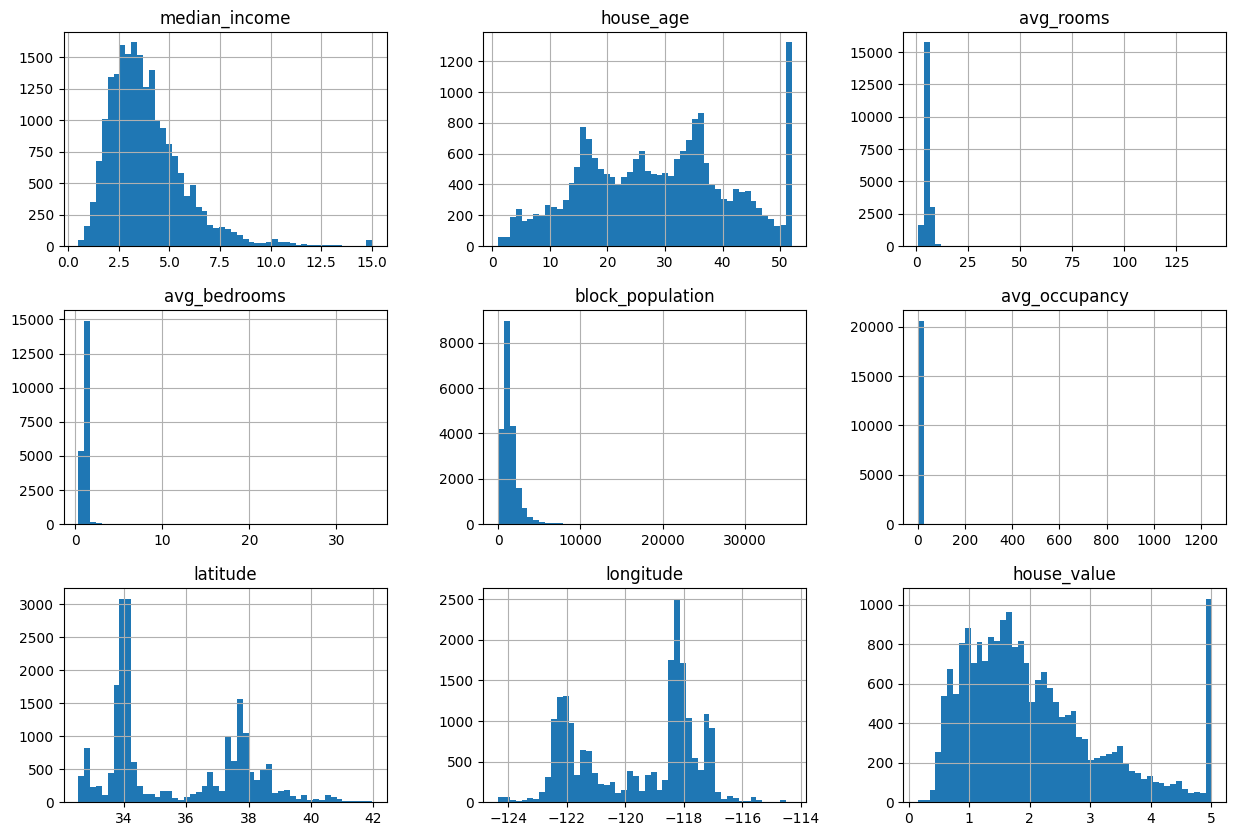

In [75]:
import matplotlib.pyplot as plt
ax=df.hist(bins=50,figsize=(15,10))

# Exploratory Data Analysis

<Axes: >

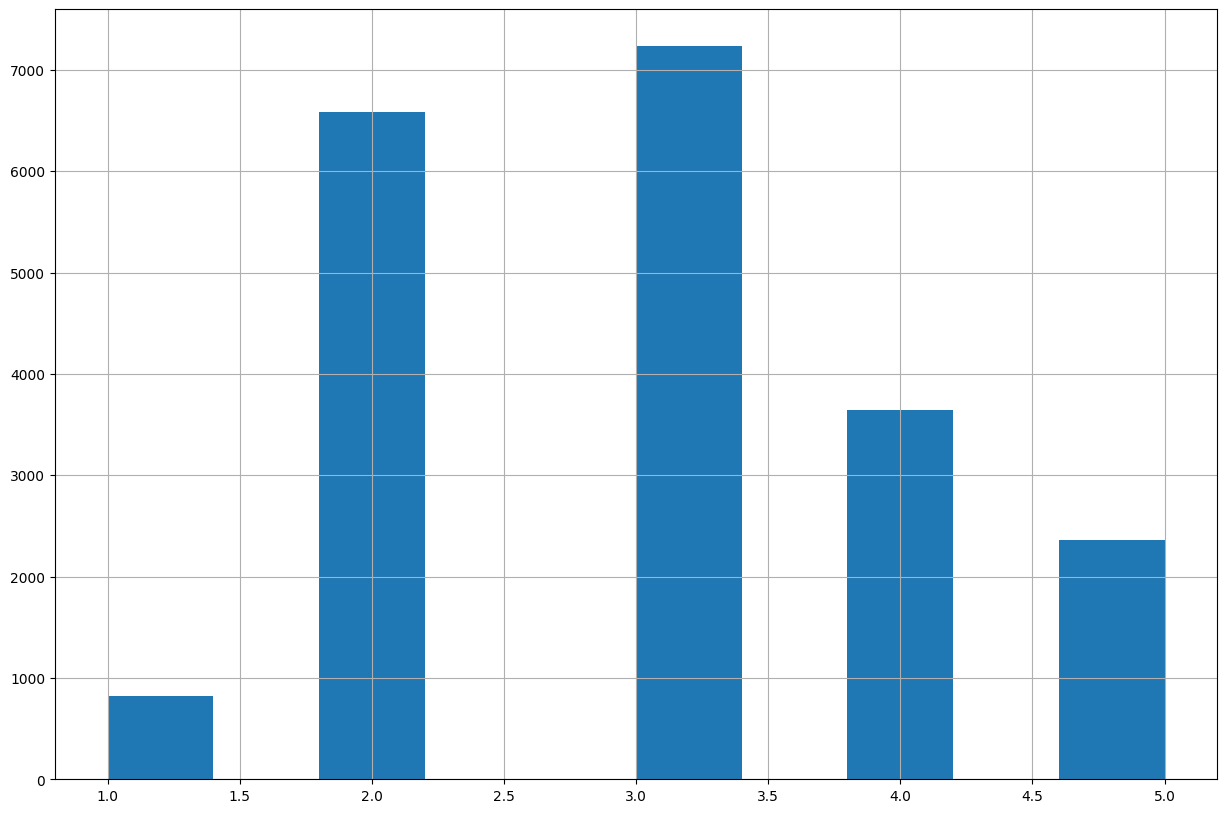

In [76]:
import numpy as np
# # Defined a new feature income_cat which is income category and used if for sampling
# df['income_cat']=np.ceil(df['median_income']/1.5)
# df['income_cat'].where(df['income_cat']<5,5.0,inplace=True)

df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
df["income_cat"].hist(figsize=(15,10))

## SPLIT DATA INTO TRAINING & TESTING

In [77]:
from sklearn.model_selection import StratifiedShuffleSplit
# Stratified sampling in proportion to income
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['income_cat']):
    trdata=df.loc[train_index]
    tedata=df.loc[test_index]
# Verify the results of the training set and test set after stratified sampling
print(trdata["income_cat"].value_counts()/len(trdata))
print(tedata["income_cat"].value_counts()/len(tedata))
# Delete 'income_cat'
trdata.drop('income_cat',axis=1,inplace=True)
tedata.drop('income_cat',axis=1,inplace=True)

# trdata.to_csv("./train_set.csv",index=False)
# tedata.to_csv("./test_set.csv",index=False)
#
# trdata=pd.read_csv('train_set.csv')
# tedata=pd.read_csv('test_set.csv')
trdata.info()
tedata.info()
#data.drop('Unnamed: 0',axis=1,inplace=True)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   median_income     16512 non-null  float64
 1   house_age         16512 non-null  float64
 2   avg_rooms         16512 non-null  float64
 3   avg_bedrooms      16512 non-null  float64
 4   block_population  16512 non-null  float64
 5   avg_occupancy     16512 non-null  float64
 6   latitude          16512 non-null  float64
 7   longitude         16512 non-null  float64
 8   house_value       16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 9 columns):
 #   Column     

##  EXPLORE GEOSPATIAL DISTRIBUTION OF HOUSEHOLD

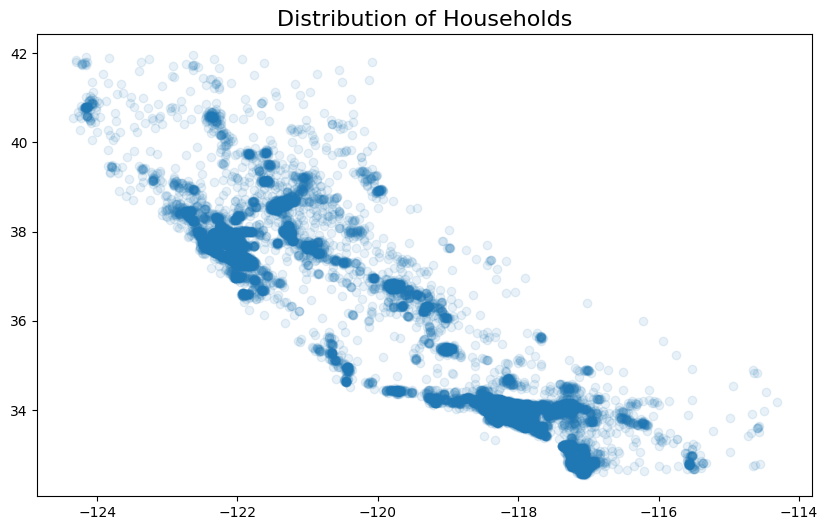

In [78]:
# By setting alpha=0.1, we can see high density areas.
plt.figure(figsize=(10,6))
plt.scatter(x=trdata['longitude'],y=trdata['latitude'],alpha=0.1)
plt.title("Distribution of Households",size=16)
plt.savefig('./img/distribution_of_household')

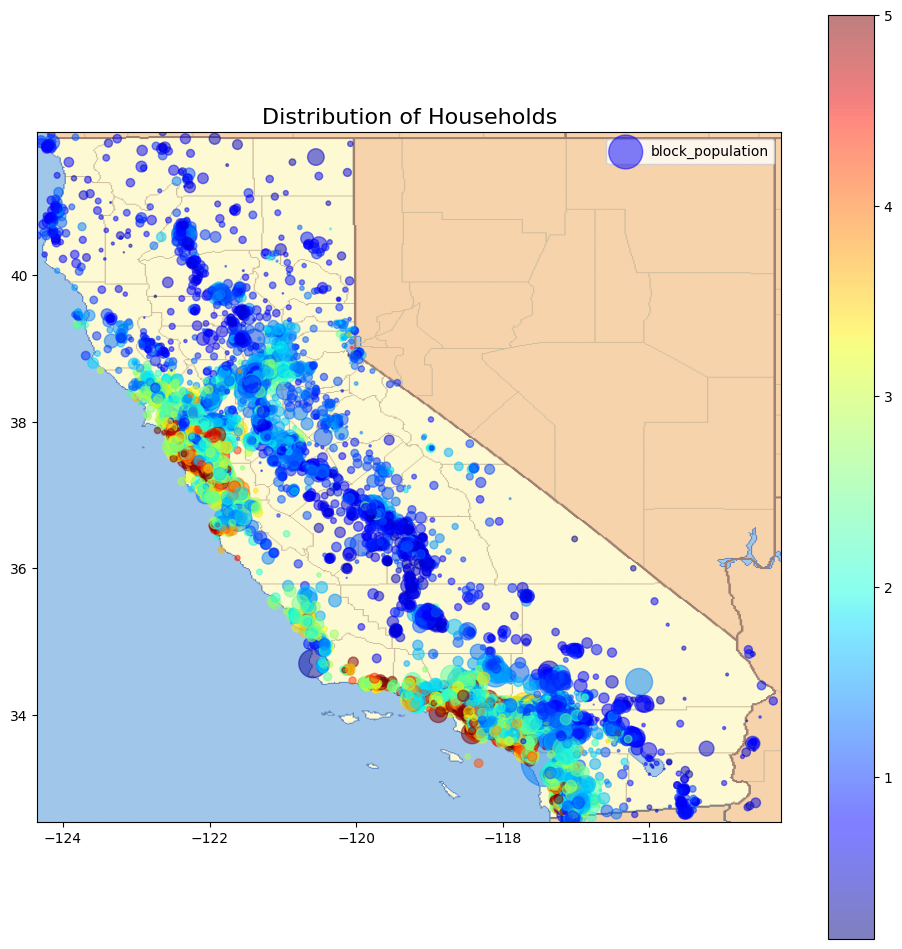

In [79]:
plt.figure(figsize=(12,12))
img=plt.imread('./img/bg/california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=trdata['longitude'],y=trdata['latitude'],alpha=0.5,s=trdata['block_population']/30,c=trdata['house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='block_population')
plt.colorbar()
plt.title("Distribution of Households",size=16)
plt.legend()
plt.savefig('./img/distribution_of_calf_household')


## PLOT BIVARITATE CORRELATION MATRIX

use  Pearson's correlation coefficient to see the correlation of 'medial house value' with other columns

In [80]:
corr_matrix=trdata.corr()
corr_matrix['house_value'].sort_values(ascending=False)



house_value         1.000000
median_income       0.687151
avg_rooms           0.146255
house_age           0.114146
avg_occupancy      -0.021991
block_population   -0.026882
avg_bedrooms       -0.043294
longitude          -0.047466
latitude           -0.142673
Name: house_value, dtype: float64

## plot masked numpy correlation matrix

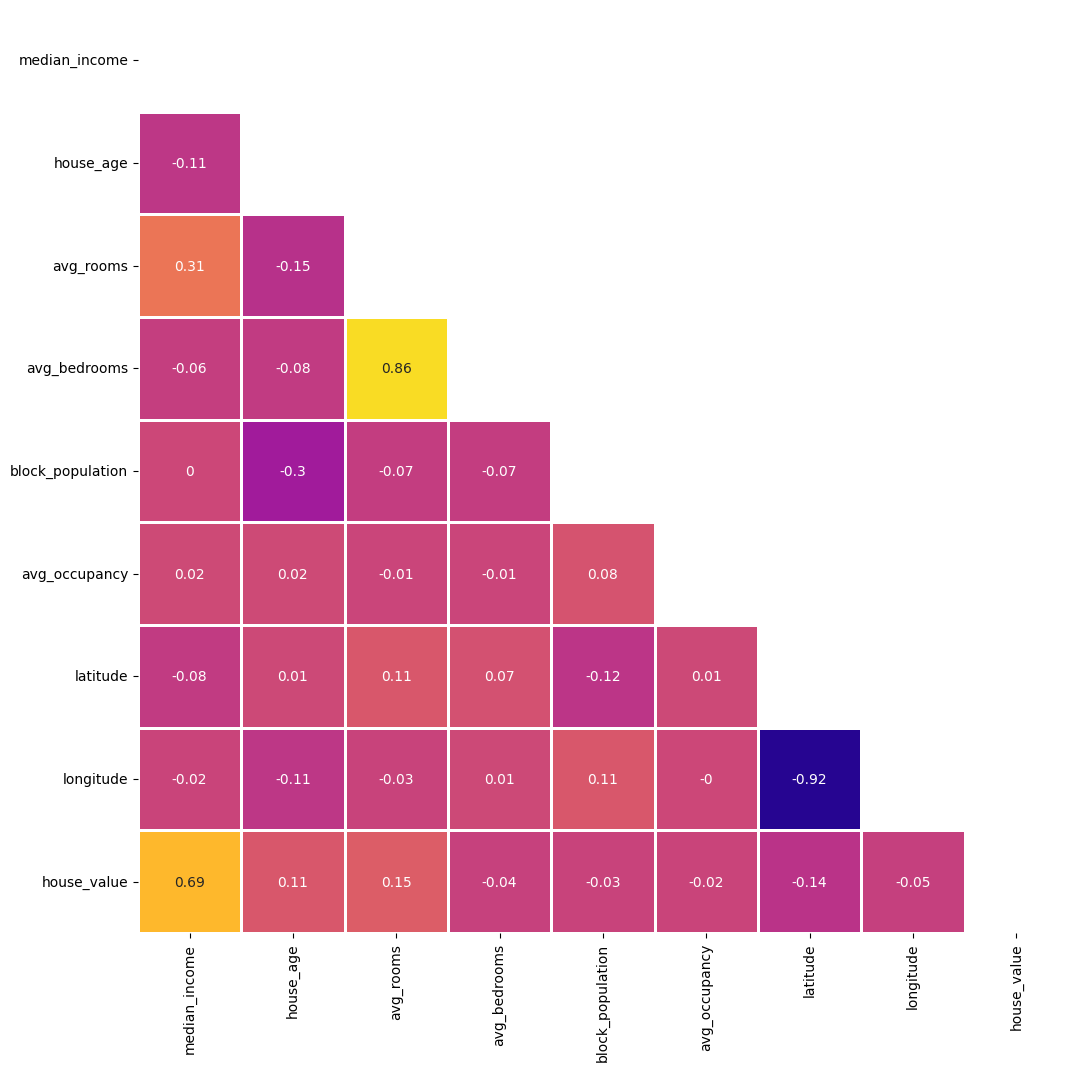

In [81]:
import seaborn as sns
''' Function to plot correlation of features '''
def corrMat(df,path):
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,12))
    mask = np.zeros_like(corr_mat,dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0,
                cmap='plasma',square=False,lw=2,annot=True,cbar=False,)
    plt.savefig('./img/'+path)
    plt.show()
corrMat(trdata,'pre_correlation_matrix') # plot masked numpy correlation matrix

Target variable median_house_value is very mildly correlated to all but one feature here: median_income, so one might outline this as an important feature.

## BIVARIATE SCATTERED DATA

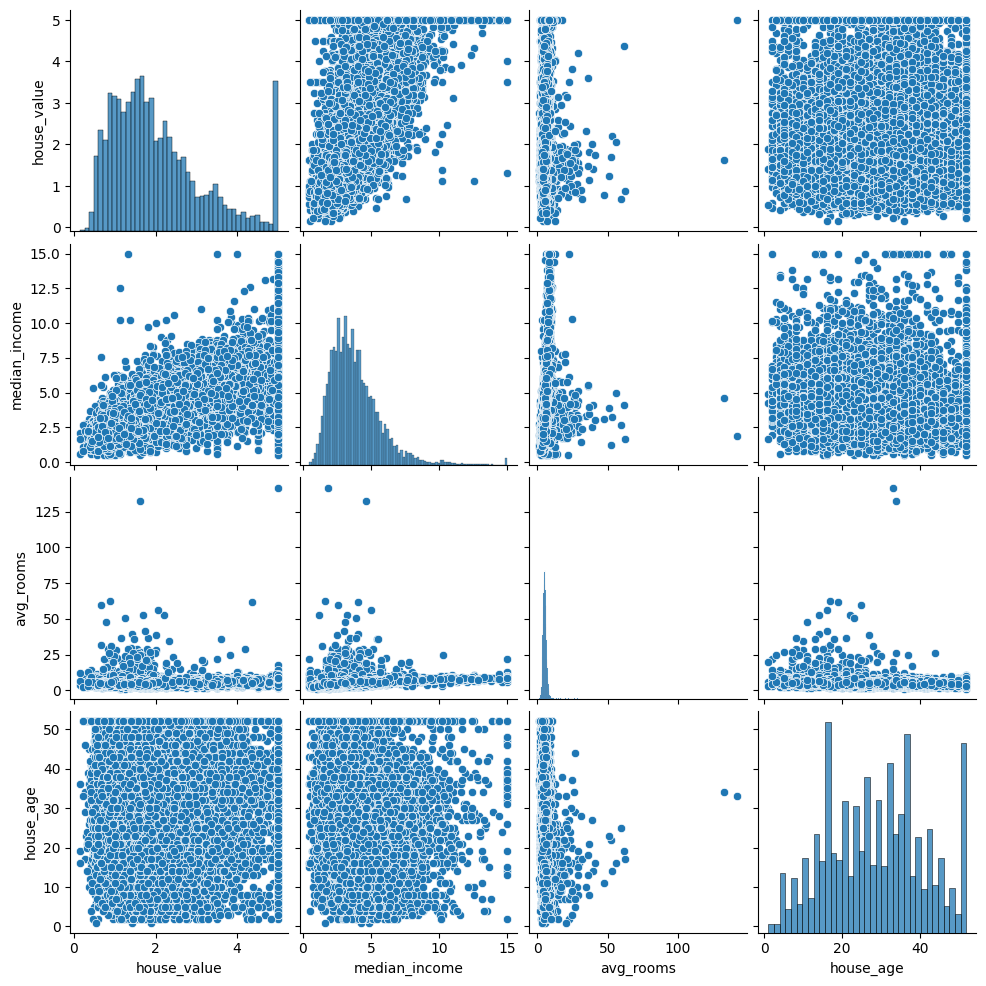

In [82]:
fig=sns.pairplot(trdata[['house_value','median_income','avg_rooms','house_age']])
fig.savefig('./img/pairplot', dpi = 400)

Median Income is the most promising attribute to get Median House Price

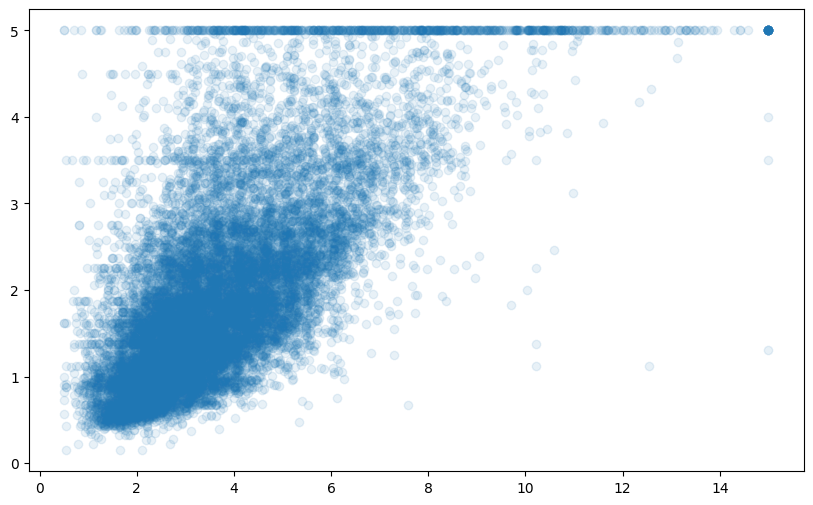

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(y=trdata['house_value'],x=trdata['median_income'],alpha=0.1)
plt.savefig('./img/med_income_scatter')

A clear line can be seen at 500k at which the data is capped. Similar lines can be seen around 450k,350k. This kind of data may degrade the performance of model.
 Make a feature that contains both longtitude & latitude

## REMOVE OUTLIERS

# Less noticable outliers

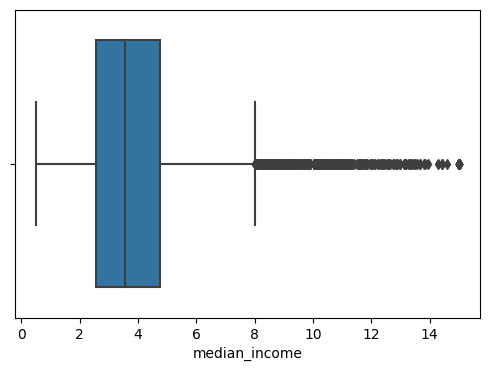

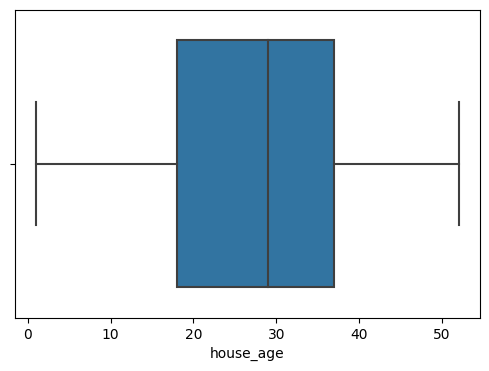

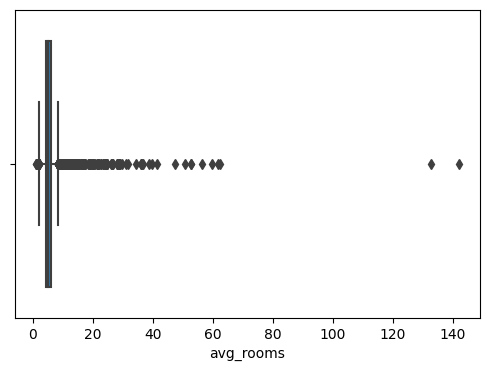

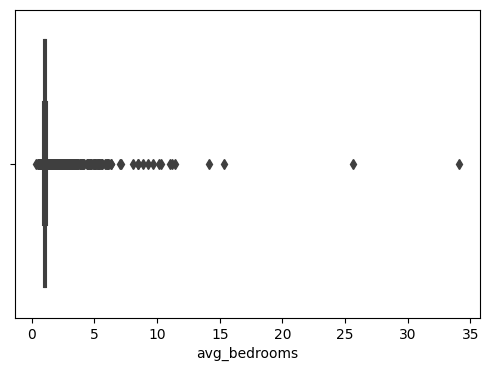

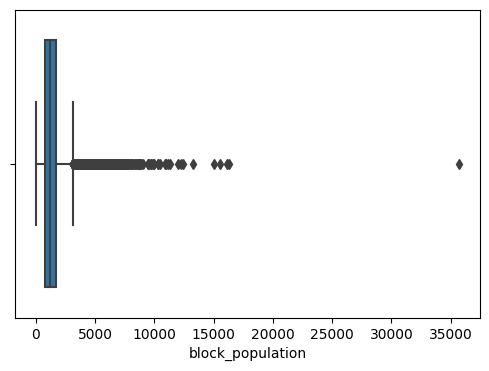

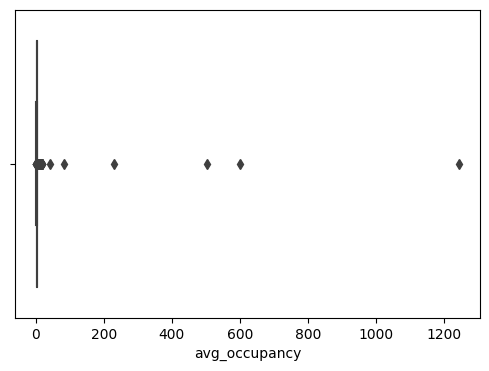

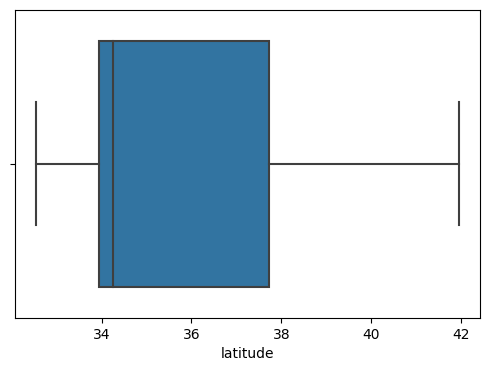

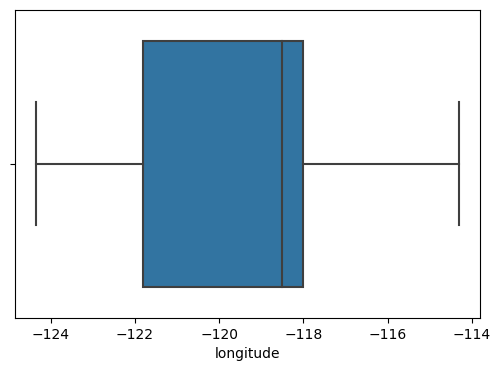

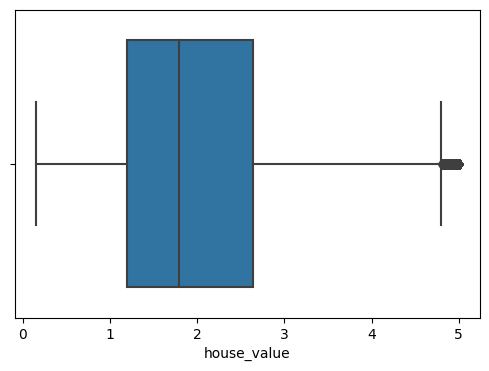

In [94]:
# fig, ax = plt.subplots()
# trdata.boxplot(figsize=(15,9),ax=ax)4

filepath = './img/boxplot'
if not os.path.isdir(filepath):
    os.mkdir(filepath)
for i in trdata.columns:
    fig, ax = plt.subplots()
    fig.set_size_inches(6,4)
    sns.boxplot(x=i,data=trdata,ax=ax)
    fig.savefig(filepath+'/'+i)

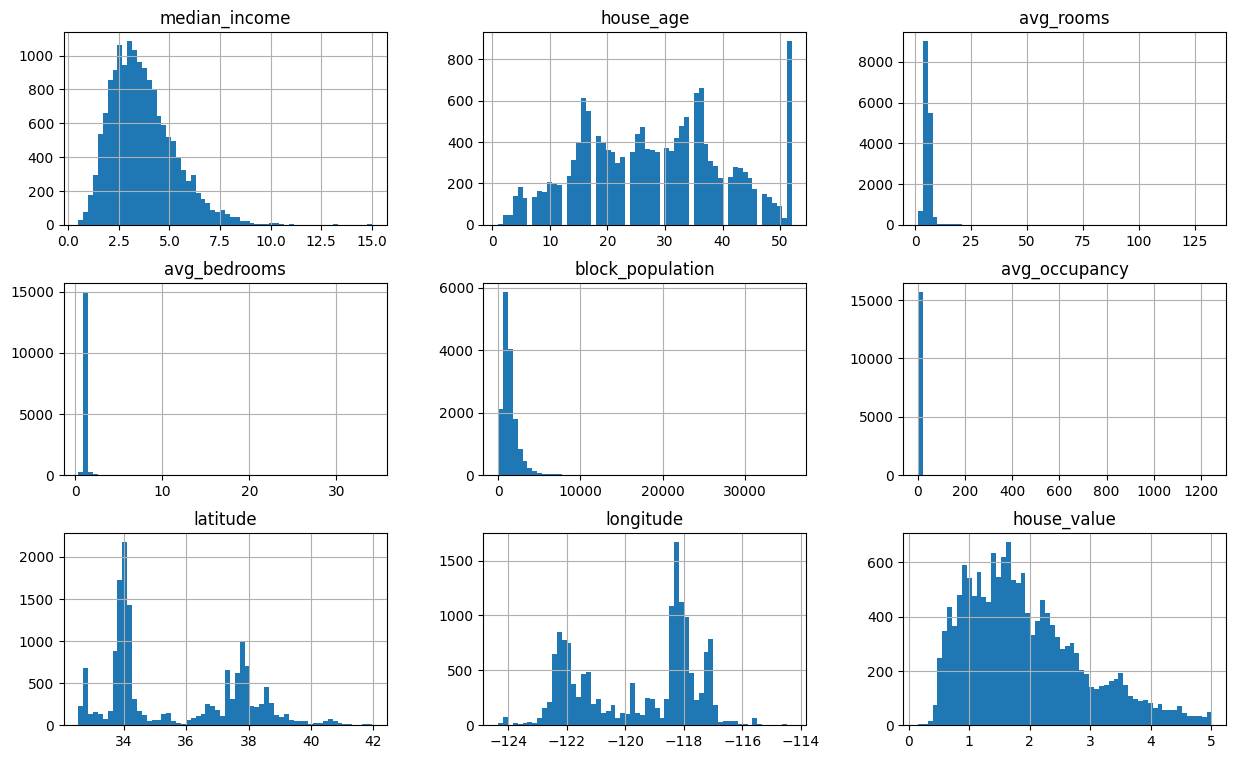

In [85]:
# use skewness correction via feature transformation
maxval = trdata['house_value'].max() # get the maximum value
trdata_upd = trdata[trdata['house_value'] != maxval]
trdata_upd.hist(bins=60, figsize=(15,9))
tedata_upd = tedata[tedata['house_value'] != maxval]

array([[<Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'house_age'}>,
        <Axes: title={'center': 'avg_rooms'}>],
       [<Axes: title={'center': 'avg_bedrooms'}>,
        <Axes: title={'center': 'block_population'}>,
        <Axes: title={'center': 'avg_occupancy'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'house_value'}>]], dtype=object)

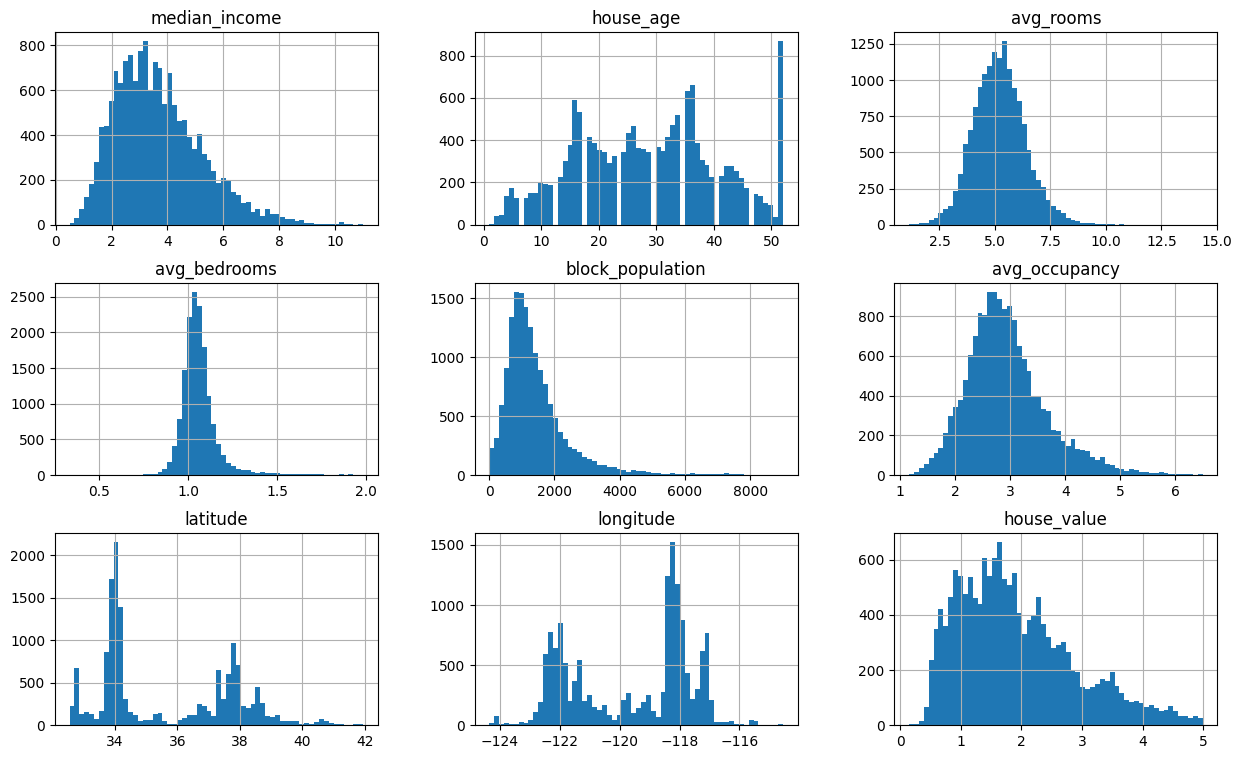

In [86]:
def RemoveOutliers(df):
    maxval = df['house_value'].max() # get the maximum value
    df = df[df['house_value']!=maxval].reset_index(drop=True)
    # df=df[(df['median_house_value']!=500001) | (df['median_income']>=2)].reset_index(drop=True)
    df = df[df['median_income']<=11].reset_index(drop=True)
    # df=df[(df['median_house_value']!=350000) | (df['median_income']>=1.5)].reset_index(drop=True)
    # df=df[(df['median_house_value']!=450000) | (df['median_income']>=2)].reset_index(drop=True)
    # df=df[(df['median_house_value']>=350000) | (df['median_income']<=9.5)].reset_index(drop=True)
    df = df[df['block_population']<=9000].reset_index(drop=True)
    df = df[(df['avg_occupancy']>=1.15) & (df['avg_occupancy']<=6.5)].reset_index(drop=True)
    df = df[df['avg_rooms']<20].reset_index(drop=True)
    df = df[df['avg_bedrooms']<2].reset_index(drop=True)
    return df
trdata_upd = RemoveOutliers(trdata_upd)
trdata_upd.hist(bins=60, figsize=(15,9))


In [87]:
# trdata_upd['block_population'].apply(lambda x: np.log1p(x)**2.5).hist(bins=50,label='a')
# plt.legend()
# skewness=[]
# for i in trdata_upd.columns:
#     skewness.append(trdata_upd[i].skew())
# pd.DataFrame(data=skewness,index=trdata_upd.columns,columns=['skewness']).sort_values(by='skewness',ascending=False)

In [88]:
# StandardScaler
# from sklearn.preprocessing import StandardScaler
# std = StandardScaler()
# trdata_upd[0:(len(trdata_upd) - 1)]=pd.DataFrame(std.fit_transform(trdata_upd[0:(len(trdata_upd) - 1)]))
# trdata_upd.describe()

## CREATING NEW FEATURES

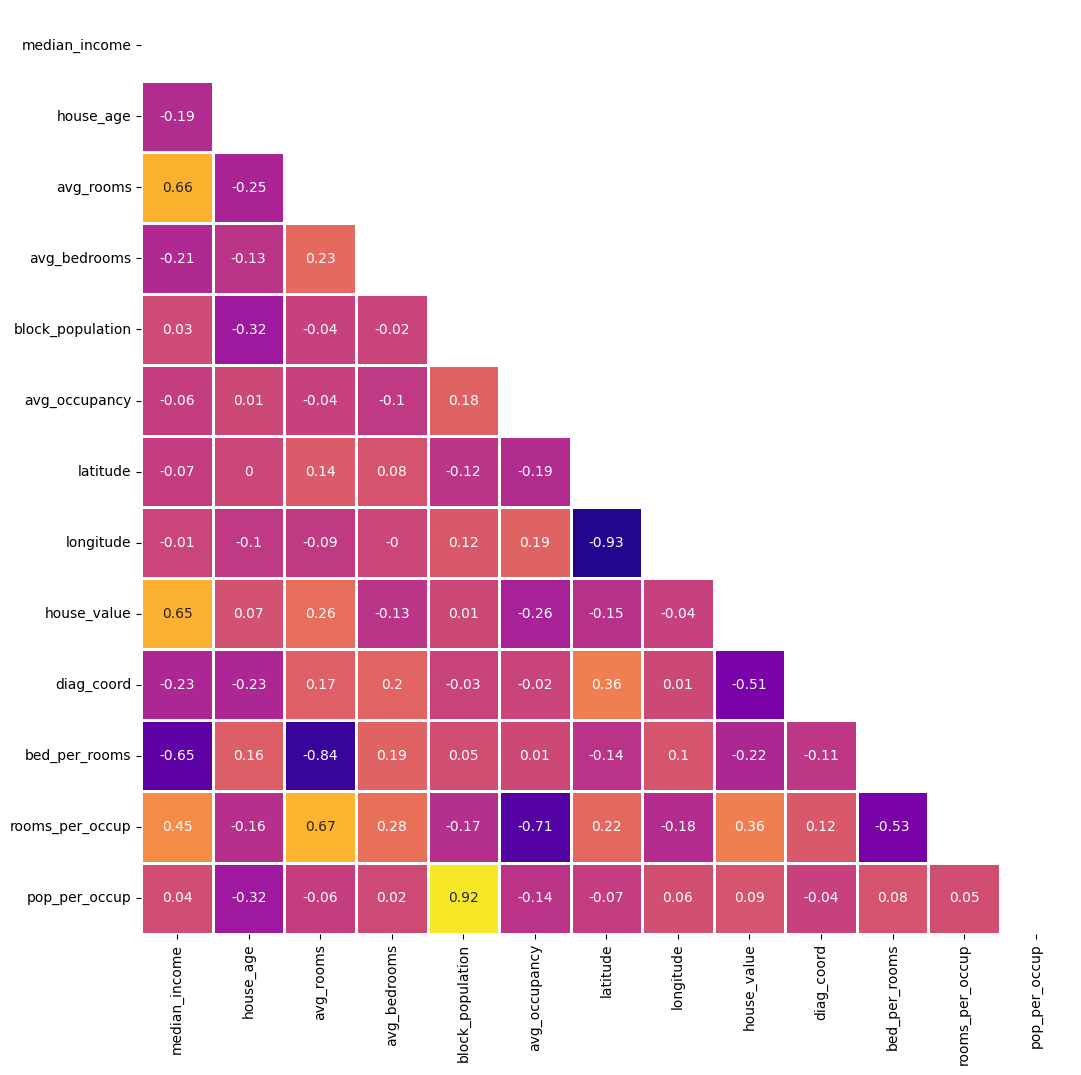

array([[<Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'house_age'}>,
        <Axes: title={'center': 'avg_rooms'}>,
        <Axes: title={'center': 'avg_bedrooms'}>],
       [<Axes: title={'center': 'block_population'}>,
        <Axes: title={'center': 'avg_occupancy'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'house_value'}>,
        <Axes: title={'center': 'diag_coord'}>,
        <Axes: title={'center': 'bed_per_rooms'}>,
        <Axes: title={'center': 'rooms_per_occup'}>],
       [<Axes: title={'center': 'pop_per_occup'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

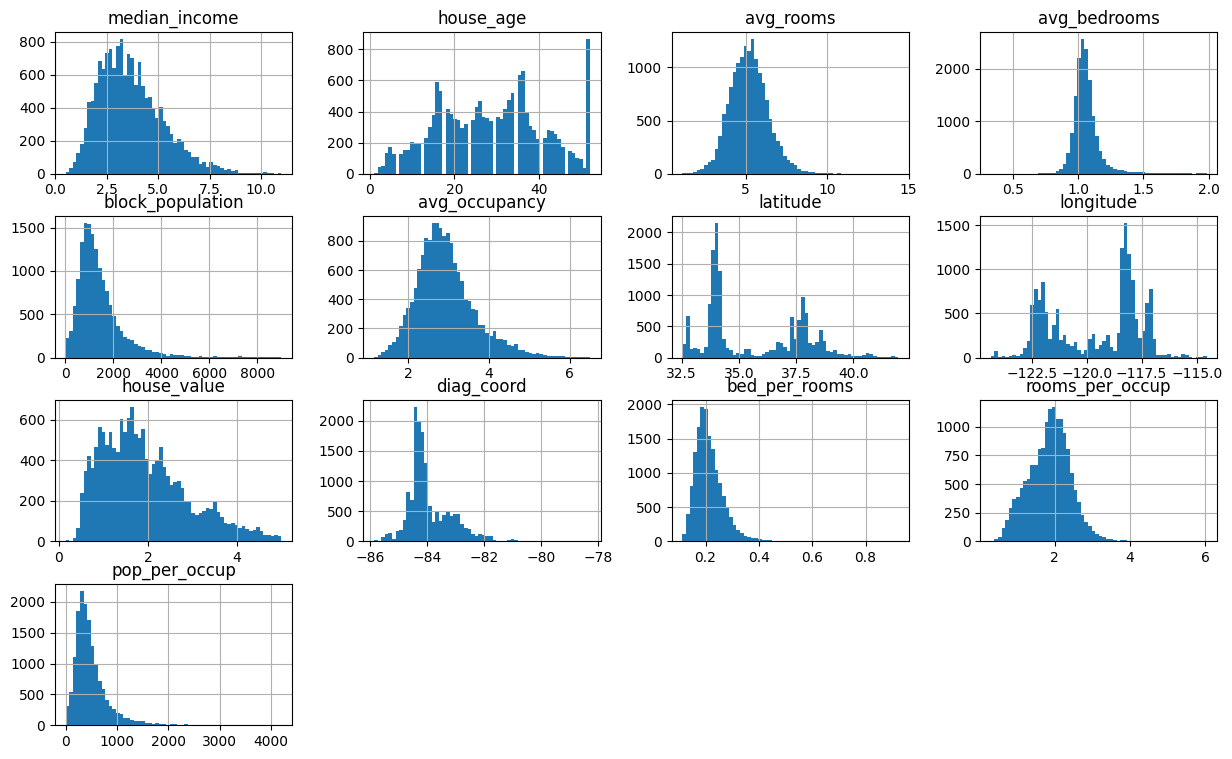

In [89]:
trdata_upd['diag_coord'] = (trdata_upd['longitude'] + trdata_upd['latitude'])         # 'diagonal coordinate', works for this coord
trdata_upd['bed_per_rooms'] = trdata_upd['avg_bedrooms']/trdata_upd['avg_rooms'] # feature w/ bedrooms/room ratio
trdata_upd['rooms_per_occup']=trdata_upd['avg_rooms']/trdata_upd['avg_occupancy']
trdata_upd['pop_per_occup']=trdata_upd['block_population']/trdata_upd['avg_occupancy']
corr_matrix=trdata_upd.corr()
corr_matrix['house_value'].sort_values(ascending=False)
corrMat(trdata_upd,'upd_correlation_matrix')
trdata_upd.hist(bins=60, figsize=(15,9))

* We can note a clear correlation for diag_coord & our target variable from the map plot(inverse correlation)
* rooms_per_occup has better correlation with median house value than total rooms(avg_rooms) and total_bedrooms.
* bed_per_rooms has better correlation with total bedrooms(avg_bedrooms)

In [90]:
tedata_upd['diag_coord'] = (tedata_upd['longitude'] + tedata_upd['latitude'])         # 'diagonal coordinate', works for this coord
tedata_upd['bed_per_rooms'] = tedata_upd['avg_bedrooms']/tedata_upd['avg_rooms'] # feature w/ bedrooms/room ratio
tedata_upd['rooms_per_occup']=tedata_upd['avg_rooms']/tedata_upd['avg_occupancy']
# PS:这个暂时也加上去了，如果后面效果不好可以删掉，但是注意两个（trdata_upd+tedata_upd）都drop
tedata_upd['pop_per_occup']=tedata_upd['block_population']/tedata_upd['avg_occupancy']

C:\Users\xy\AppData\Local\Temp\ipykernel_18580\1120037987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tedata_upd['diag_coord'] = (tedata_upd['longitude'] + tedata_upd['latitude'])         # 'diagonal coordinate', works for this coord
C:\Users\xy\AppData\Local\Temp\ipykernel_18580\1120037987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tedata_upd['bed_per_rooms'] = tedata_upd['avg_bedrooms']/tedata_upd['avg_rooms'] # feature w/ bedrooms/room ratio
C:\Users\xy\AppData\Local\Temp\ipykernel_18580

In [91]:
trdata_upd.info()
tedata_upd.info()
data_upd= pd.concat([trdata_upd,tedata_upd])
data_upd.info()
trdata_upd.to_csv("./dataset/train_set.csv",index=False)
tedata_upd.to_csv("./dataset/test_set.csv",index=False)
data_upd.to_csv("./dataset/data_set.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   median_income     15419 non-null  float64
 1   house_age         15419 non-null  float64
 2   avg_rooms         15419 non-null  float64
 3   avg_bedrooms      15419 non-null  float64
 4   block_population  15419 non-null  float64
 5   avg_occupancy     15419 non-null  float64
 6   latitude          15419 non-null  float64
 7   longitude         15419 non-null  float64
 8   house_value       15419 non-null  float64
 9   diag_coord        15419 non-null  float64
 10  bed_per_rooms     15419 non-null  float64
 11  rooms_per_occup   15419 non-null  float64
 12  pop_per_occup     15419 non-null  float64
dtypes: float64(13)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3949 entries, 17352 to 3965
Data columns (total 13 columns):
 #   Column            Non-Null Co